# FINA - Results Exploration

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge

tqdm.pandas()
sns.set(rc={'figure.figsize':(13,10)})

def encode_categories(df, cols_to_encode):
    le = preprocessing.LabelEncoder()
    for col in cols_to_encode:
        df[col] = le.fit_transform(df[col])
    return df

In [20]:
%%time
results_df = pd.read_parquet('./data/results.parquet')
results_df['Year'] = pd.DatetimeIndex(pd.to_datetime(results_df.Date, infer_datetime_format=True)).year
results_df.head()

CPU times: user 2.66 s, sys: 269 ms, total: 2.93 s
Wall time: 2.41 s


,DisciplineName,EventName,EventResultUtcDateTime,Gender,SportCode,Date,IsSummary,Order,PhaseName,AthleteResultAge,...,Qualified,RT,Rank,RecordType,ResultId,Splits,Time,TimeBehind,Time_Seconds,Year
0,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,1924-07-20,False,NaN,Finals,17.0,...,None,None,1.0,None,R1165798,[],1:12.40,None,72.4,1924.0
1,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,1924-07-20,False,NaN,Finals,18.0,...,None,None,2.0,None,R1165764,[],1:12.80,00.40,72.8,1924.0
2,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,1924-07-20,False,NaN,Finals,18.0,...,None,None,3.0,None,R1165709,[],1:14.20,01.80,74.2,1924.0
3,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,1924-07-20,False,NaN,Finals,24.0,...,None,None,4.0,None,R1165829,[],1:15.40,03.00,75.4,1924.0
4,Women 100m Freestyle,Olympic Games Paris 1924,1924-07-20T13:00:00,Women,SW,1924-07-20,False,NaN,Finals,17.0,...,None,None,5.0,None,R1165001,[],1:20.80,08.40,80.8,1924.0


In [21]:
results_df = results_df.loc[ (results_df.DisciplineName == 'Men 200m Butterfly') & (results_df.IsSummary == False)]
results_df.corr()

,Order,AthleteResultAge,HeatRank,Lane,Points,Rank,Time_Seconds,Year
Order,1.000000,0.114023,-0.119529,-0.013967,0.253551,-0.360664,-0.038575,0.326571
AthleteResultAge,0.114023,1.000000,-0.141297,-0.021569,0.475234,-0.206065,-0.120449,0.046611
HeatRank,-0.119529,-0.141297,1.000000,0.109077,-0.329509,0.511114,0.248576,0.019341
Lane,-0.013967,-0.021569,0.109077,1.000000,-0.064484,0.065826,0.032103,0.023553
Points,0.253551,0.475234,-0.329509,-0.064484,1.000000,-0.541027,-0.862265,-0.156589
Rank,-0.360664,-0.206065,0.511114,0.065826,-0.541027,1.000000,0.428219,0.061213
Time_Seconds,-0.038575,-0.120449,0.248576,0.032103,-0.862265,0.428219,1.000000,-0.087037
Year,0.326571,0.046611,0.019341,0.023553,-0.156589,0.061213,-0.087037,1.000000


In [22]:
cols_to_keep = ['EventName', 'HeatRank', 'AthleteResultAge', 'Time_Seconds', 'Year', 'Lane']
cols_remove = [col for col in results_df.columns if col not in cols_to_keep]
results_df = results_df.drop(columns=cols_remove)
results_df = encode_categories(results_df, ['EventName'])
results_df.fillna(0, inplace=True)
results_df.dropna(inplace=True)
results_df

,EventName,AthleteResultAge,HeatRank,Lane,Time_Seconds,Year
5973,81,23.0,1.0,4.0,139.3,1956.0
5974,81,21.0,2.0,3.0,143.8,1956.0
5975,81,27.0,3.0,5.0,143.9,1956.0
5976,81,25.0,4.0,1.0,146.6,1956.0
5977,81,26.0,5.0,6.0,147.2,1956.0
...,...,...,...,...,...,...
465689,64,0.0,0.0,0.0,0.0,2021.0
465781,64,0.0,0.0,0.0,0.0,2021.0
465782,64,0.0,0.0,0.0,0.0,2021.0
465880,11,0.0,0.0,0.0,0.0,2021.0


In [23]:
results_df.corr()

,EventName,AthleteResultAge,HeatRank,Lane,Time_Seconds,Year
EventName,1.000000,0.037749,-0.208498,0.089607,0.028657,-0.027315
AthleteResultAge,0.037749,1.000000,-0.092171,0.117914,-0.058489,0.106824
HeatRank,-0.208498,-0.092171,1.000000,-0.218353,0.228473,0.010241
Lane,0.089607,0.117914,-0.218353,1.000000,0.021966,0.074958
Time_Seconds,0.028657,-0.058489,0.228473,0.021966,1.000000,0.166096
Year,-0.027315,0.106824,0.010241,0.074958,0.166096,1.000000


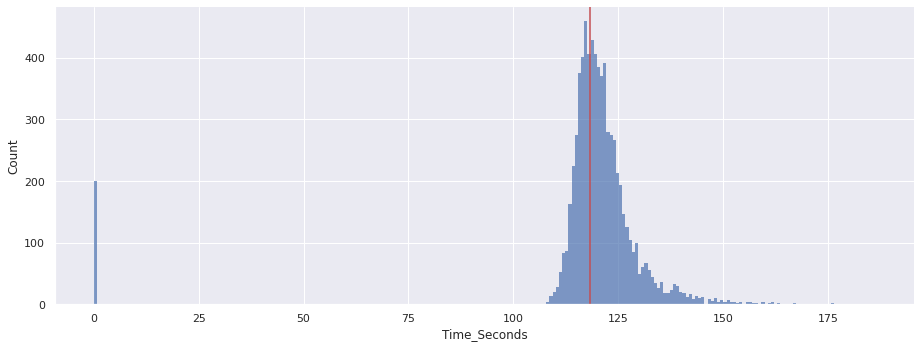

In [24]:
g = sns.displot(data=results_df, x='Time_Seconds', palette="crest", fill=True,alpha=.7, linewidth=0,)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
mean = results_df['Time_Seconds'].mean()
plt.axvline(mean, color='r')

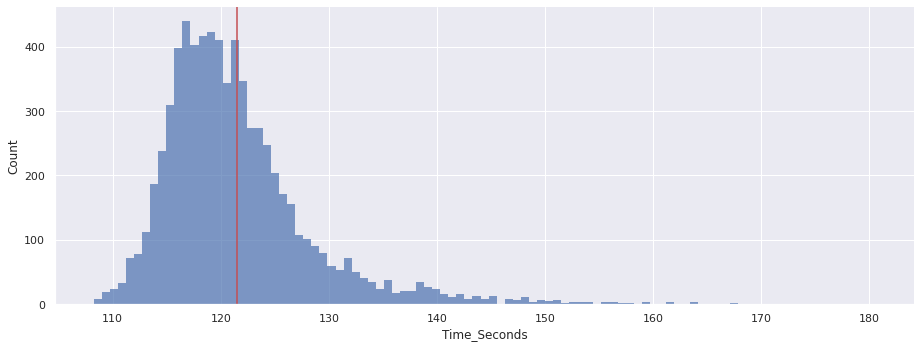

In [25]:
results_df_no_outliers = results_df[(np.abs(stats.zscore(results_df['Time_Seconds'])) < 3)]

g = sns.displot(data=results_df_no_outliers, x='Time_Seconds', palette="crest", fill=True,alpha=.7, linewidth=0,)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
mean = results_df_no_outliers['Time_Seconds'].mean()
plt.axvline(mean, color='r')

In [26]:
y = results_df['Time_Seconds']
X = results_df.drop(columns=['Time_Seconds'])

In [27]:
clf = LinearRegression().fit(X, y)
clf.score(X, y)

0.09299236643977116

In [29]:
clf.predict(np.array([[1, 18, 4, 4, 1985]]))

/home/gbodra/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([112.78202478])

In [30]:
regressor = DecisionTreeRegressor(random_state=0).fit(X, y)
regressor.score(X, y)

0.995725484298757

In [31]:
regressor.predict(np.array([[1, 18, 4, 4, 1985]]))

/home/gbodra/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([119.94])

In [32]:
bayes_regressor = BayesianRidge(compute_score=True).fit(X, y)
bayes_regressor.score(X, y)

0.09298106279097074

In [33]:
bayes_regressor.predict(np.array([[1, 18, 4, 4, 1985]]))

/home/gbodra/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


array([112.78687232])

In [11]:
results_df['DisciplineName'].unique()

array(['Women 100m Freestyle', 'Women 400m Freestyle',
       'Women 100m Backstroke', 'Women 200m Breaststroke',
       'Women 4x100m Freestyle Relay', 'Men 100m Freestyle',
       'Men 400m Freestyle', 'Men 1500m Freestyle', 'Men 100m Backstroke',
       'Men 200m Breaststroke', 'Men 4x200m Freestyle Relay',
       'Women 100m Butterfly', 'Men 200m Butterfly',
       'Women 4x100m Medley Relay', 'Men 4x100m Medley Relay',
       'Women 400m Medley', 'Men 200m Backstroke', 'Men 400m Medley',
       'Men 4x100m Freestyle Relay', 'Women 200m Freestyle',
       'Women 800m Freestyle', 'Women 200m Backstroke',
       'Women 100m Breaststroke', 'Women 200m Butterfly',
       'Women 200m Medley', 'Men 200m Freestyle', 'Men 100m Breaststroke',
       'Men 100m Butterfly', 'Men 200m Medley', 'Women 50m Freestyle',
       'Women 4x200m Freestyle Relay', 'Men 50m Freestyle',
       'Women 50m Backstroke', 'Women 50m Breaststroke',
       'Women 50m Butterfly', 'Women 100m Medley', 'Men 50m Back

In [13]:
results_df_filtered = results_df.loc[ (results_df.DisciplineName == 'Women 50m Freestyle')] # (results_df.PhaseName == 'Finals') &
results_df_filtered['Time_Seconds'].describe()

count    17835.000000
mean        25.943688
std          4.985245
min          0.000000
25%         25.310000
50%         26.150000
75%         27.310000
max         63.970000
Name: Time_Seconds, dtype: float64

In [14]:
results_df_filtered = results_df_filtered.loc[(results_df_filtered.Time_Seconds > 0) & (results_df_filtered.Time_Seconds <= 2000)]
results_df_filtered['Time_Seconds'].describe()

count    17327.000000
mean        26.704316
std          2.295244
min         22.930000
25%         25.390000
50%         26.200000
75%         27.360000
max         63.970000
Name: Time_Seconds, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Time_Seconds'>

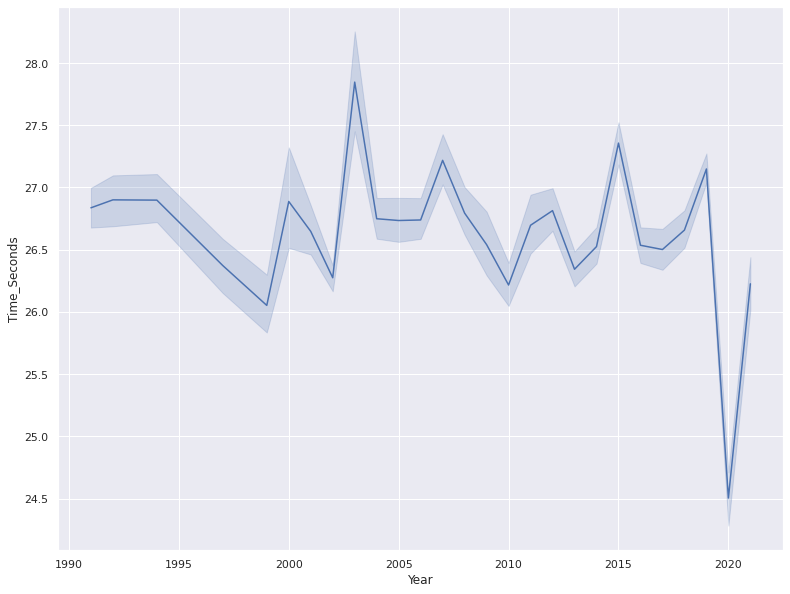

In [15]:
sns.lineplot(data=results_df_filtered, x="Year", y="Time_Seconds")

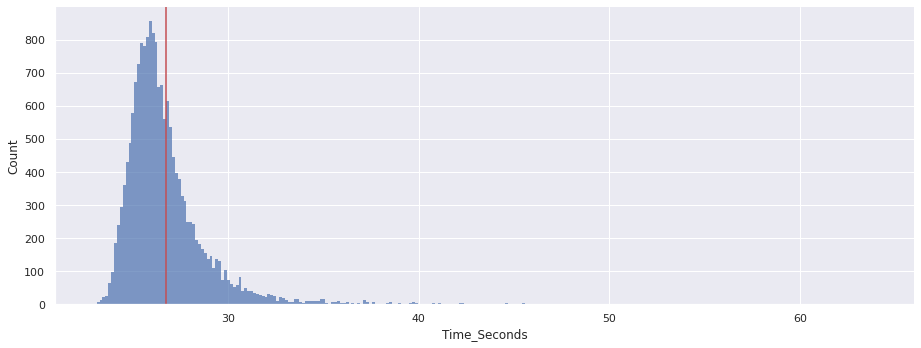

In [16]:
g = sns.displot(data=results_df_filtered, x='Time_Seconds', palette="crest", fill=True,alpha=.7, linewidth=0,)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
mean = results_df_filtered['Time_Seconds'].mean()
plt.axvline(mean, color='r')

In [17]:
results_df_filtered_no_outliers = results_df_filtered[(np.abs(stats.zscore(results_df_filtered['Time_Seconds'])) < 3)]

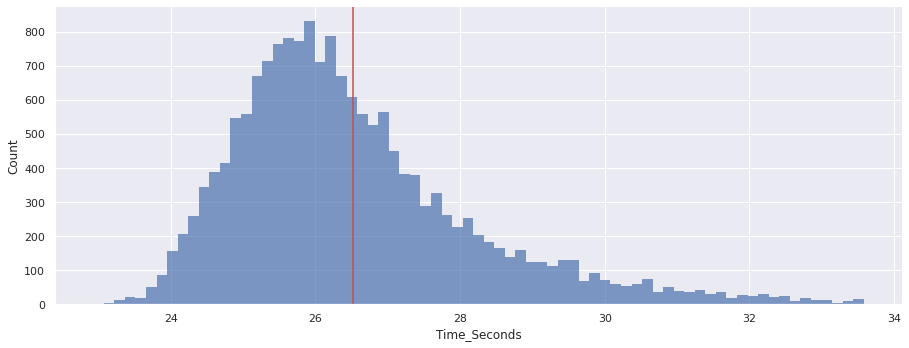

In [18]:
g = sns.displot(data=results_df_filtered_no_outliers, x='Time_Seconds', palette="crest", fill=True,alpha=.7, linewidth=0,)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
mean = results_df_filtered_no_outliers['Time_Seconds'].mean()
plt.axvline(mean, color='r')